In [1]:
import pandas as pd
from data_processing import creat_labeled_data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from prepare_for_embedding import prepare_for_embedding_layer
from Embedding_Matrix import create_embedding_dict, create_embedding_matrix
from build_model import build_model

Using TensorFlow backend.


In [2]:
def load_data_review(file):
    data = pd.read_csv(file)
    # print(data.head())
    # # Check for any null values in the dataframe.
    # print("Check whether there are any null values: ", data.isnull().values.any())
    # print("The data frame's shape is: ", data.shape)
    # # Describe the data frame of movie review
    # data.describe(include='all')
    # # Address the statistic with this dataset
    # print(data['sentiment'].value_counts())
    return data

movie_review = load_data_review('IMDB Dataset.csv')

In [3]:
comments, labels = creat_labeled_data(movie_review)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(comments, labels, test_size=0.2, shuffle=0.42)
print(len(x_train))

40000


# Prepare for embedding layer

## Convert words to index

In [5]:
parameters, x_train, x_test = prepare_for_embedding_layer(movie_review, x_train, x_test)
print(x_train.shape)

(40000, 100)


After this function executed, we will have a dictionary contains parameters: tokenzier, vocab_size and max_len.
We use tokenizer to convert words into indexes with a specific vocabulary size and maximum length of each senntence.

In [6]:
tokenizer = parameters['tokenizer']
vocab_size = parameters['vocab_size']
max_len = parameters['max_len']

# Create embedding matrix

In [7]:
embedding_dict = create_embedding_dict()

Embedding dictionary with the key is word and value is the coefficients of this word in glove vector

In [8]:
embedding_matrix = create_embedding_matrix(embedding_dict, tokenizer, vocab_size, max_len)

# Build model

In [9]:
model = build_model(vocab_size=vocab_size, embedding_matrix=embedding_matrix, max_len=max_len, input_shape=x_train.shape)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          9228800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 9,346,177
Trainable params: 117,377
Non-trainable params: 9,228,800
_________________________________________________________________


## Train model

In [10]:
hist = model.fit(x_train, y_train, epochs=24, verbose=1, validation_split=0.2, batch_size=32)

Train on 32000 samples, validate on 8000 samples
Epoch 1/24
32000/32000 [==============================] - 123s 4ms/step - loss: 0.5638 - acc: 0.7075 - val_loss: 0.4368 - val_acc: 0.7960
Epoch 2/24
32000/32000 [==============================] - 122s 4ms/step - loss: 0.4371 - acc: 0.7967 - val_loss: 0.3880 - val_acc: 0.8245
Epoch 3/24
32000/32000 [==============================] - 123s 4ms/step - loss: 0.4023 - acc: 0.8130 - val_loss: 0.3873 - val_acc: 0.8250
Epoch 4/24
32000/32000 [==============================] - 123s 4ms/step - loss: 0.3776 - acc: 0.8279 - val_loss: 0.3640 - val_acc: 0.8326
Epoch 5/24
32000/32000 [==============================] - 123s 4ms/step - loss: 0.3537 - acc: 0.8412 - val_loss: 0.3527 - val_acc: 0.8428
Epoch 6/24
32000/32000 [==============================] - 125s 4ms/step - loss: 0.3340 - acc: 0.8505 - val_loss: 0.3225 - val_acc: 0.8609
Epoch 7/24
32000/32000 [==============================] - 123s 4ms/step - loss: 0.3192 - acc: 0.8587 - val_loss: 0.3275 - v

# Plot model
## Accuracy and loss

### Accuracy

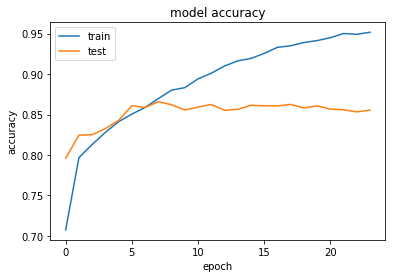

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Loss

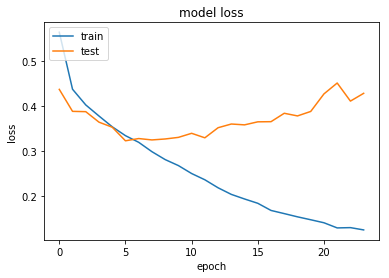

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Evaluate model on test set

In [15]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test Score: ", score[0])
print("Test Accuracy: ", score[1])

10000/10000 [==============================] - 12s 1ms/step
Test Score:  0.4464739995121956
Test Accuracy:  0.8495000004768372


## Make prediction

In [16]:
predictions = model.predict([x_test])
# Check whether the prediction is true
for i in range(20):
    predictions[i] = predictions[i].squeeze()
    if predictions[i] >= 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
    print(f"Predict: {predictions[i]} while Actual: {y_test[i]}")

Predict: [0.] while Actual: 0
Predict: [1.] while Actual: 1
Predict: [0.] while Actual: 1
Predict: [1.] while Actual: 1
Predict: [0.] while Actual: 0
Predict: [1.] while Actual: 1
Predict: [0.] while Actual: 1
Predict: [1.] while Actual: 1
Predict: [1.] while Actual: 1
Predict: [0.] while Actual: 1
Predict: [0.] while Actual: 0
Predict: [1.] while Actual: 1
Predict: [0.] while Actual: 1
Predict: [1.] while Actual: 1
Predict: [1.] while Actual: 1
Predict: [1.] while Actual: 1
Predict: [1.] while Actual: 1
Predict: [1.] while Actual: 1
Predict: [0.] while Actual: 0
Predict: [0.] while Actual: 0


In [17]:
model.save('Movies_Review.h5')